Prepare the environment. 

In [14]:
! pip install nibabel h5py nilearn

  Using cached nilearn-0.9.1-py3-none-any.whl (9.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 36.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 90.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/30.4 MB 58.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.5/503.5 kB 38.9 MB/s eta 0:00:00
  Using cached idna-3.3-py3-none-any.whl (61 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 13.5 MB/s eta 0:00:00


In [14]:
! wget -P /project/4180000.24/asym/template http://repo.mouseimaging.ca/repo/DSURQE_40micron/DSURQE_40micron_R_mapping.csv
! wget -P /project/4180000.24/asym/template http://repo.mouseimaging.ca/repo/DSURQE_40micron/DSURQE_40micron_labels.mnc
! wget -P /project/4180000.24/asym/template http://repo.mouseimaging.ca/repo/DSURQE_40micron/DSURQE_40micron_mask.mnc

--2022-06-16 11:37:25--  http://repo.mouseimaging.ca/repo/DSURQE_40micron/DSURQE_40micron_R_mapping.csv
Resolving repo.mouseimaging.ca (repo.mouseimaging.ca)... 192.75.158.41
Connecting to repo.mouseimaging.ca (repo.mouseimaging.ca)|192.75.158.41|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13600 (13K) [text/csv]
Saving to: ‘/project/4180000.24/asym/template/DSURQE_40micron_R_mapping.csv.1’

100%[======================================>] 13,600      --.-K/s   in 0s      

2022-06-16 11:37:25 (313 MB/s) - ‘/project/4180000.24/asym/template/DSURQE_40micron_R_mapping.csv.1’ saved [13600/13600]

--2022-06-16 11:37:26--  http://repo.mouseimaging.ca/repo/DSURQE_40micron/DSURQE_40micron_labels.mnc
Resolving repo.mouseimaging.ca (repo.mouseimaging.ca)... 192.75.158.41
Connecting to repo.mouseimaging.ca (repo.mouseimaging.ca)|192.75.158.41|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72596577 (69M)
Saving to: ‘/project/4180000.24/asym/templ

In [48]:
from pandas import read_csv, concat
df1 = read_csv('/project/4180000.24/asym/tabledata_7fad3104-0f89-4f73-91b4-13661176abb3.csv')
df2 = read_csv('/project/4180000.24/asym/tabledata_481a6fe0-9499-4c79-80e0-fadcd6a5d713.csv')
df3 = read_csv('/project/4180000.24/asym/tabledata_4480e65c-d04c-498a-b4b5-7dabbfbed709.csv')
df4 = read_csv('/project/4180000.24/asym/tabledata_8197daaf-7bdc-41c6-9eff-eb372d1b4d25.csv')
df5 = read_csv('/project/4180000.24/asym/tabledata_a03680e5-60b5-4874-8773-880009425de0.csv')
df6 = read_csv('/project/4180000.24/asym/tabledata_c7a5e086-4f3e-4038-8f02-5738cbe538e4.csv')
df7 = read_csv('/project/4180000.24/asym/tabledata_ed0af19e-9b70-4fcc-a576-68dc1e0c8628.csv')


In [49]:
df = concat([df1,df2,df3,df4,df5,df6,df7])

In [56]:
df.to_csv('asset/study_stable.csv')


In [58]:
import os
from pandas import read_csv


data_dir='/project/4180000.24/asym'
mask_file=os.path.join(data_dir, 'template/DSURQE_40micron_mask.mnc')
label_file=os.path.join(data_dir, 'template/DSURQE_40micron_labels.mnc')
roi_file=os.path.join(data_dir,'template/DSURQE_40micron_R_mapping.csv')
scratch_folder='/scratch/data/joagra'

df = read_csv('asset/study_stable.csv')
new_affine = np.load('asset/affine.npy')


In [62]:
# make some directories
! mkdir -p {data_dir}/tmp
#absolute jacobian output
! mkdir -p {data_dir}/proc/absolute/vol_AI
! mkdir -p {data_dir}/proc/absolute/roi_orig
! mkdir -p {data_dir}/proc/absolute/roi_flip
! mkdir -p {data_dir}/proc/absolute/roi_AI
#relative jacobian output
! mkdir -p {data_dir}/proc/relative/vol_AI
! mkdir -p {data_dir}/proc/relative/roi_orig
! mkdir -p {data_dir}/proc/relative/roi_flip
! mkdir -p {data_dir}/proc/relative/roi_AI
#cache directory
! mkdir -p {scratch_folder}

In [66]:
# import the relevant libraries
import os
import numpy as np
import nibabel as nib
from nilearn.image import resample_to_img, math_img, resample_img, swap_img_hemispheres
from nilearn.input_data import NiftiLabelsMasker


# init ROI mask
masker = NiftiLabelsMasker(labels_img=label_file, mask_img=mask_file, standardize=False, memory=scratch_folder, verbose=0)

for mouseID, absolute, relative in zip(df['POND_Mouse_ID'], df['Scan_To_Global_Absolute_Jacobians_Path'],df['Scan_To_Global_Relative_Jacobians_Path']):
    print("now doing "+mouseID)
    
    #building zip file path
    zip_path = os.path.normpath(absolute)
    zip_path = zip_path.split(os.sep)[0]
    full_zip_path = os.path.join(data_dir, 'zip',zip_path+'.zip')
    
    if os.path.exists(full_zip_path):
        
    
        ! unzip -o -qq -d {data_dir}/tmp {full_zip_path}
    
        for jac_mode in ["abs", "rel"]:
            if jac_mode == "abs":
                minc_path=absolute
                ouput_path='absolute'
            else:
                minc_path=relative 
                ouput_path='relative'
            
            

            jac=os.path.join(data_dir,'tmp',minc_path)
            
            if os.path.exists(jac):
    
                #swap hemiphere and resample to get flipped image
                jac_sw = swap_img_hemispheres(jac)
                jac_sw_rs = resample_to_img(jac_sw, jac)
        
                # calculate assymetry index and resample to mask
                asym = math_img("(img1 - img2)/(img1 + img2)",img1=jac, img2=jac_sw_rs)
                asym_rs = resample_img(asym, new_affine, target_shape=(97, 191, 63)) 
        
                # convert to nifti bc MINC is terrible to handle IMO and save
                asym_nifti = nib.Nifti1Image(asym_rs.get_data(), affine=asym_rs.affine)
                nib.save(asym_nifti,os.path.join(data_dir,'proc',ouput_path,'vol_AI',zip_path+'.nii.gz'))

                # extract jacobians using DSURQE atlas labels
                jac_extract = masker.fit_transform(jac)
                jac_sw_extract = masker.fit_transform(jac_sw_rs)
                AI = (jac_extract[0]- jac_sw_extract[0])/(jac_extract[0]+ jac_sw_extract[0])
                np.savetxt(os.path.join(data_dir,'proc',ouput_path,'roi_orig',zip_path+'.txt'),jac_extract)
                np.savetxt(os.path.join(data_dir,'proc',ouput_path,'roi_flip',zip_path+'.txt'),jac_sw_extract)
                np.savetxt(os.path.join(data_dir,'proc',ouput_path,'roi_AI',zip_path+'.txt'),AI)
        
        # clen up
        ! rm -rf {data_dir}/tmp/{zip_path}

        
# clear the cache
! rm -rf {scratch_folder}

now doing PND36_HSC_0001
now doing PND36_HSC_0002
now doing PND36_HSC_0003
now doing PND36_HSC_0004
now doing PND36_HSC_0005
now doing PND36_HSC_0006
now doing PND36_HSC_0007
now doing PND36_HSC_0008
now doing PND36_HSC_0009
now doing PND36_HSC_0010
now doing PND36_HSC_0011
now doing PND36_HSC_0012
now doing PND38_HSC_0001
now doing PND38_HSC_0002
now doing PND38_HSC_0003
now doing PND38_HSC_0004
now doing PND38_HSC_0005
now doing PND38_HSC_0006
now doing PND38_HSC_0007
now doing PND38_HSC_0008
now doing PND38_HSC_0009
now doing PND38_HSC_0010
now doing PND38_HSC_0011
now doing PND38_HSC_0012
now doing PND38_HSC_0013
now doing PND38_HSC_0014
now doing PND38_HSC_0015
now doing PND38_HSC_0016
now doing PND38_HSC_0017
now doing PND38_HSC_0018
now doing PND38_HSC_0019
now doing PND40_HSC_0001
now doing PND40_HSC_0002
now doing PND40_HSC_0003
now doing PND40_HSC_0004
now doing PND40_HSC_0005
now doing PND40_HSC_0006
now doing PND40_HSC_0007
now doing PND40_HSC_0008
now doing PND40_HSC_0009


now doing PND14_HSC_0002
now doing PND14_HSC_0003
now doing PND14_HSC_0004
now doing PND14_HSC_0005
now doing PND14_HSC_0006
now doing PND14_HSC_0007
now doing PND14_HSC_0008
now doing PND14_HSC_0009
now doing PND14_HSC_0010
now doing PND14_HSC_0011
now doing PND14_HSC_0012
now doing PND14_HSC_0013
now doing PND14_HSC_0014
now doing PND14_HSC_0015
now doing PND14_HSC_0016
now doing PND14_HSC_0017
now doing PND14_HSC_0018
now doing PND14_HSC_0019
now doing PND14_HSC_0020
now doing PND14_HSC_0021
now doing PND14_HSC_0022
now doing PND14_HSC_0023
now doing PND14_HSC_0024
now doing PND14_HSC_0025
now doing PND14_HSC_0026
now doing PND14_HSC_0027
now doing PND14_HSC_0028
now doing PND14_HSC_0029
now doing PND14_HSC_0030
now doing PND14_HSC_0031
now doing PND15_HSC_0001
now doing PND15_HSC_0002
now doing PND15_HSC_0003
now doing PND15_HSC_0004
now doing PND15_HSC_0005
now doing PND15_HSC_0006
now doing PND15_HSC_0007
now doing PND15_HSC_0008
now doing PND15_HSC_0009
now doing PND15_HSC_0010


now doing PND17_HSC_0031
now doing PND17_HSC_0032
now doing PND17_HSC_0033
now doing PND17_HSC_0034
now doing PND17_HSC_0035
now doing PND17_HSC_0036
now doing PND17_HSC_0037
now doing PND17_HSC_0038
now doing PND17_HSC_0039
now doing PND17_HSC_0040
now doing PND17_HSC_0041
now doing PND17_HSC_0042
now doing PND17_HSC_0043
now doing PND17_HSC_0044
now doing PND17_HSC_0045
now doing PND17_HSC_0046
now doing PND17_HSC_0047
now doing PND17_HSC_0048
now doing PND18_HSC_0001
now doing PND18_HSC_0002
now doing PND18_HSC_0003
now doing PND18_HSC_0004
now doing PND18_HSC_0005
now doing PND18_HSC_0006
now doing PND18_HSC_0007
now doing PND18_HSC_0008
now doing PND18_HSC_0009
now doing PND18_HSC_0010
now doing PND18_HSC_0011
now doing PND18_HSC_0012
now doing PND18_HSC_0013
now doing PND18_HSC_0014
now doing PND18_HSC_0015
now doing PND18_HSC_0016
now doing PND18_HSC_0017
now doing PND18_HSC_0018
now doing PND18_HSC_0019
now doing PND18_HSC_0020
now doing PND18_HSC_0021
now doing PND18_HSC_0022


In [17]:
# import the relevant libraries

from nilearn.image import resample_img, load_img

# load the image
jac_file=os.path.join(data_dir,'data/PND54_HSC_0020_01_SE01_MR/scans/MR_MINC-mice_ex_vivo_fixedbrain_32um_longesp/resources/Scan_To_Global_Absolute_Jacobians/files/img_21may10.1.november_2007_distortion_corrected-final-nlin_with_additional_inverted_absolute_log_determinant_fwhm0.2_common.mnc')
jac=load_img(jac_file)


In [18]:
print(jac.affine)

[[ 0.     0.     0.056 -6.27 ]
 [ 0.     0.056  0.    -8.19 ]
 [ 0.056  0.     0.    -4.2  ]
 [ 0.     0.     0.     1.   ]]


In [19]:
new_affine = np.where(jac.affine==0.056,0.1,jac.affine)

In [37]:
np.save('/home/traaffneu/joagra/code/mouse_assymetry/asset/affine',new_affine)

In [33]:
jac_rs = resample_img(jac_file, new_affine, target_shape=(97, 191, 63))


In [34]:
jac_rs.shape

(97, 191, 63)

In [35]:
asym_nifti = nib.Nifti1Image(jac_rs.get_data(), affine=jac_rs.affine)
nib.save(asym_nifti,os.path.join(data_dir,'test.nii.gz'))


In [32]:
load_img(mask_file).shape

(241, 478, 315)

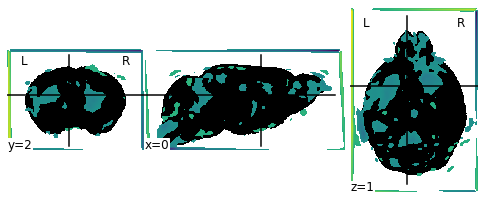

In [88]:
from nilearn import plotting

# plot the OG jacobian
plotting.plot_img(jac, bg_img=mask_file, threshold=0.1)

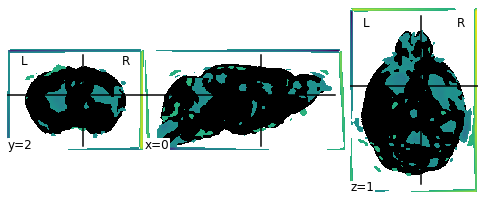

In [89]:
# plot the swapped jacobian. Should be opposite image above
plotting.plot_img(jac_sw_rs, bg_img=mask_file, threshold=0.1)

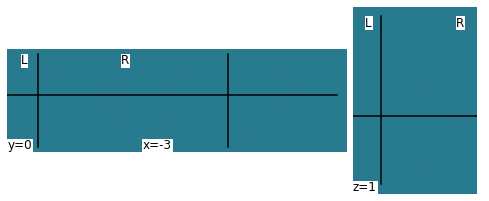

In [90]:
# plot the assymetry image
plotting.plot_img(asym, bg_img=mask_file)